## Naslov projekta: Analiza podatkov o prometnih nesrecah v Sloveniji


Opis problema: Prometne nesrece predstavljajo pomemben druzbeni problem, saj lahko povzrocijo veliko materialno skodo, poskodbe ali celo smrt. Namen tega projekta je analizirati podatke o prometnih nesrecah v Sloveniji, da bi lahko identificirali vorce, trende in dejavnike tveganja ter razvili smernice za izbolisanje varnosti na cestah.

Cilji/vprasanja:

1. Kateri so najpogostejsi vroki prometnih nesrec v Sloveniji?
2. Kateri so najbolj ogrozeni udelezenci v prometu?
3. Kako se stevilo prometnih nesrec spreminja skozi cas?
4. Analiza specifičnih vrst nesreč: Nabor podatkov vključuje informacije o vrsti nesreče, tako da je mogoče analizirati, katere vrste nesreč so najpogostejše, katere so najbolj nevarne in kateri dejavniki prispevajo k njim.
5. Kaksna je povezava med razlicnimi dejavniki tveganja (npr. alkohol, prekoractev hitrosti, slaba vidljivost) in verjetnostjo prometne nesrece?


### Podatki

Oblika podatkov: Podatki so bili zajeti iz spletne strani OPSI (https://podatki.gov.si/dataset/mnzpprometne-nesrece-od-leta-2009-dalje), kjer so na voljo podatki o prometnih nesrecah v Sloveniji za obdobje 2009-2022. Podatki so v obliki CSV datotek, ki vsebujejo podrobne informacije o ZaporednaStevilkaPN, KlasifikacijaNesrece, UpravnaEnotaStoritve, DatumPN, UraPN, VNaselju, Lokacija, VrstaCesteNaselja, SifraCesteNaselja, TekstCesteNaselja, SifraOdsekaUlice, TekstOdsekaUlice, StacionazaDogodka. OpisKraja, VzrokNesrece, TipNesrece, VremenskeOkoliscine, StanjePrometa, StanjeVozisca, VrstaVozisca, GeoKoordinataX, GeoKoordinataY, ZaporednaStevilkaOsebeVPN, Povzrocitelj, Starost, Spol, UEStalnegaPrebivalisca, Drzavljanstvo, PoskodbaUdelezenca, VrstaUdelezenca, UporabaVarnostnegaPasu, VozniskiStazVLetih, VozniskiStazVMesecih, VrednostAlkotesta, VrednostStrokovnegaPregleda. Podatki so med seboj loceni s ";", zato ji je najprej potrebno med seboj ločiti in ustrezno oblikovati.

Analiza podatkov je potekala po oblikovanih ciljih, kjer smo z ustreznimi vizualizacijskimi orodi prikazali ugotovitve ciljev.

Raziskava prometnih nesreč v Sloveniji med leti 2009 in 2022 je temeljila na analizi zbranih podatkov.

V raziskavi so bili analizirani vzroki prometnih nesreč, udeleženci nesreč in njihove starostne skupine ter različne vrste udeležencev v prometu. Podrobna analiza podatkov je razkrila, da so najpogostejši vzroki nesreč premik z vozilom, neprilagojena hitrost, nepravilna smer vožnje, neupoštevanje pravil prednosti in neustrezna varnostna razdalja.



#### 1. Zanimalo nas je, kateri so najpogostejši vzroki za nastanek prometne nesreče. Najpogostejši vzrok nesreče je bil premik z vozilom, ki je prispeval k 25% vseh nesreč. Ta vzrok je lahko povezan s preveliko hitrostjo, neupoštevanjem pravil prednosti, neustrezno varnostno razdaljo ali nepravilno smerjo vožnje. Neprilagojena hitrost je bila drugi najpogostejši vzrok (18%), kar lahko nakazuje na prehitro in nevarno vožnjo ter pomanjkanje spoštovanja cestnih predpisov. Na tretjem mestu je bila nepravilna smer vožnje (16%), kar kaže na potrebo po večjem poznavanju prometnih predpisov in pravilne uporabe cest. Neupoštevanje pravil prednosti (15%) in neustrezna varnostna razdalja (11%) sta prav tako pogosti vzroki, ki lahko kažejo na slabo poznavanje cestnih predpisov in nespoštovanje drugih udeležencev v prometu.

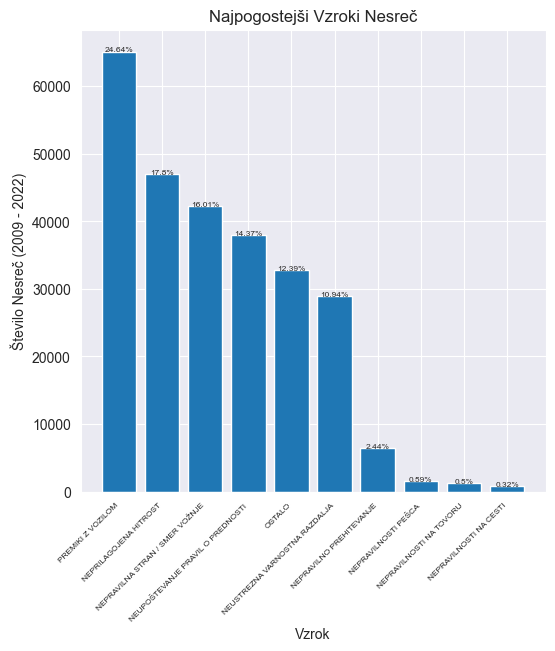

In [2]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt


datoteke = ["pn2009", "pn2010", "pn2011", "pn2012", "pn2013", "pn2014", "pn2015", "pn2016", "pn2017", "pn2018", "pn2019", "pn2020", "pn2021", "pn2022"]
vzrokNesrece = {}

for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        zaporednostDogodka = {}
        next(csv_reader)

        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            zaporednost = row_split[0]

            if not zaporednost in zaporednostDogodka:
                zaporednostDogodka[zaporednost] = 1
                row_split = (row[0] + row[1]).split(";")
                bumbum = row_split[14]

                if bumbum not in vzrokNesrece:
                    vzrokNesrece[bumbum] = 1
                else:
                    vzrokNesrece[bumbum] += 1

sortiranVzrokNesrece = dict(sorted(vzrokNesrece.items(), key=lambda x: x[1], reverse=True)[:10])
vzroki = list(sortiranVzrokNesrece.keys())
stevila = list(sortiranVzrokNesrece.values())
stevilaProcenti = [round((stevilo/sum(stevila))*100, 2) for stevilo in stevila]
stevilaProcenti = [f'{stevilo}%' for stevilo in stevilaProcenti]

plt.figure(figsize=(6, 6))
plt.bar(vzroki, stevila)
plt.xlabel('Vzrok')
plt.ylabel('Število Nesreč (2009 - 2022)')
plt.title('Najpogostejši Vzroki Nesreč')
plt.xticks(rotation=45, ha='right', fontsize=6)
for i, v in enumerate(stevilaProcenti):
    plt.text(i, stevila[i] + 5, v, ha='center', fontsize=6)
plt.show()

Odgovor: **Nadaljnja analiza podatkov je pokazala, da so najpogostejši povzročitelji prometnih nesreč stari med 19 in 33 leti, najpogostejši udeleženci pa so stari med 19 in 48 let. Moški so se v nesreče vpleli dvakrat pogosteje kot ženske. Osebni avtomobili so bili daleč najpogostejša vrsta udeležencev v nesrečah, nato vozila tovornjakov, potniki, kolesarji in vozniki motornih koles.**

#### 2.1. Najpogostejši povzročitelji nesreč so bili v starostnih skupinah med 19 in 23 leti ter med 24 in 28 leti. To nakazuje, da mlajši vozniki morda potrebujejo več usposabljanja in izkušenj za varno vožnjo, ki bi jim lahko pomagale preprečiti nesreče. Starostne skupine med 29 in 33 leti, med 34 in 38 leti ter med 44 in 48 leti so bile tudi pogosti povzročitelji nesreč, kar kaže, da lahko nevarne vožnje vplivajo na vse starostne skupine, ne le na mlajše.


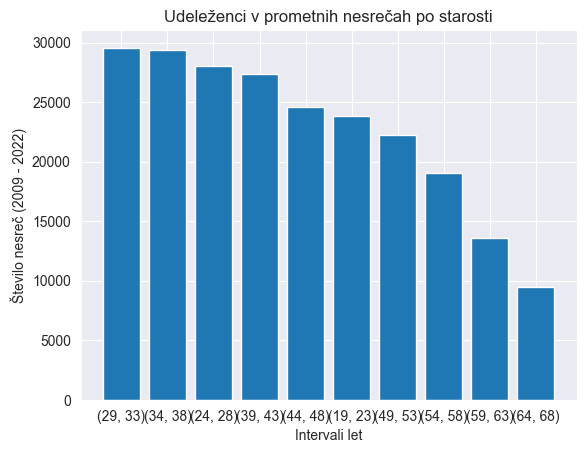

In [3]:
starost_pov = {(i, i + 4): None for i in range(4, 100 + 1, 5)}
starost_ude = {(i, i + 4): None for i in range(4, 100 + 1, 5)}
pov = 0
ude = 0

for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:

            row_split = (row[0] + row[1]).split(";")
            starost = int(row_split[24])
            pov_ude = str(row_split[23])

            if pov_ude == "UDELEŽENEC":
                for key in starost_ude.keys():
                    if key[0] <= starost <= key[1]:
                        value = starost_ude.get(key, 0)
                        starost_ude[key] = value + 1 if value is not None else 1
                        ude += 1
                        break

            elif pov_ude == "POVZROÈITELJ":
                for key in starost_pov.keys():
                    if key[0] <= starost <= key[1]:
                        value = starost_pov.get(key, 0)
                        starost_pov[key] = value + 1 if value is not None else 1
                        pov += 1
                        break

sorted_dict_ude = dict(sorted(starost_ude.items(), key=lambda x: x[1], reverse=True))
top_10_keys_ude = [str(key) for key in list(sorted_dict_ude.keys())[:10]]
top_10_values_ude = list(sorted_dict_ude.values())[:10]

plt.bar(top_10_keys_ude, top_10_values_ude)
plt.xlabel('Intervali let')
plt.ylabel('Število nesreč (2009 - 2022)')
plt.title('Udeleženci v prometnih nesrečah po starosti')
plt.show()

Odgovor: Ta koda obdeluje podatke o prometnih nesrečah, da bi prikazala starostno strukturo udeležencev nesreč. Najprej se ustvari dva slovarja z intervali starosti za udeležence in povzročitelje nesreč. Nato beremo podatke iz CSV datotek, kjer se loči podatke v vrstici na posamezne elemente in izbere starost in vlogo (povzročitelj ali udeleženec) osebe v nesreči. Za vsako osebo preveri, v kateri interval starosti spada, in število takšnih nesreč shrani v ustrezni slovar. Na koncu izbere deset intervalov z največjim številom nesreč, jih prikaže v obliki stolpčnega diagrama in dodaja oznake osi in naslov.

#### 2.2. Najpogostejši udeleženci nesreč so bili v starostnih skupinah med 29 in 33 leti, med 34 in 38 leti ter med 24 in 28 leti. To kaže na potrebo po večji ozaveščenosti in usposabljanju teh starostnih skupin za varno vožnjo ter upoštevanje cestnih predpisov. Starostne skupine med 39 in 43 leti ter med 44 in 48 leti so tudi pogosti udeleženci nesreč, kar kaže na to, da je varna vožnja pomembna za vse starosti.

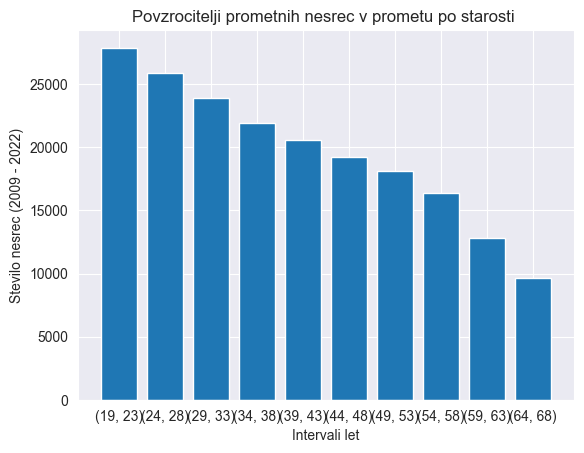

In [16]:
age_pov = {(i, i + 4): 0 for i in range(4, 100 + 1, 5)}
age_ude = {(i, i + 4): 0 for i in range(4, 100 + 1, 5)}
num_pov = 0
num_ude = 0

for file_name in datoteke:
    with open(f'podatki/{file_name}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            age = int(row_split[24])
            pov_ude = str(row_split[23])

            if pov_ude == "UDELEŽENEC":
                for key in age_ude.keys():
                    if key[0] <= age <= key[1]:
                        value = age_ude.get(key, 0)
                        age_ude[key] = value + 1 if value is not None else 1
                        num_ude += 1
                        break

            elif pov_ude == "POVZROČITELJ":
                for key in age_pov.keys():
                    if key[0] <= age <= key[1]:
                        value = age_pov.get(key, 0)
                        age_pov[key] = value + 1 if value is not None else 1
                        num_pov += 1
                        break

sorted_dict_pov = dict(sorted(age_pov.items(), key=lambda x: x[1] if x[1] is not None else float('-inf'), reverse=True))
top_10_keys_pov = [str(key) for key in list(sorted_dict_pov.keys())[:10]]
top_10_values_pov = list(sorted_dict_pov.values())[:10]

plt.bar(top_10_keys_pov, top_10_values_pov)
plt.xlabel('Intervali let')
plt.ylabel('Stevilo nesrec (2009 - 2022)')
plt.title('Povzrocitelji prometnih nesrec v prometu po starosti ')
plt.show()

Odgovor: **todo**

#### 2.3.  Iz naše raziskave smo ugotovili, da so moški okoli 75% časa povzročitelji prometnih nesreč, prav tako pa so večkrat le udeleženi v prometne nesreče (okoli 65%).


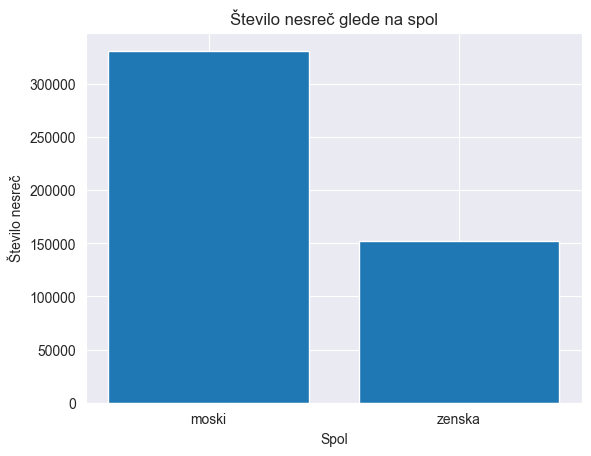

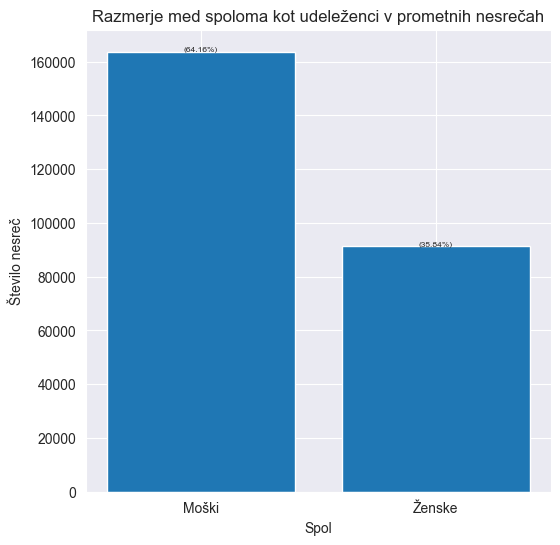

In [11]:
spola = {"moski": 0, "zenska": 0}

for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            spol = row_split[25]  # spol

            if spol == "ŽENSKI":
                spola["zenska"] += 1
            elif spol == "MOŠKI":
                spola["moski"] += 1

plt.bar(spola.keys(), spola.values())
plt.xlabel('Spol')
plt.ylabel('Število nesreč')
plt.title('Število nesreč glede na spol')
plt.show()

spola = {"moski": 0, "zenska": 0}

for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            spol = row_split[25]  # spol
            ude = row_split[23]

            if ude == "UDELEŽENEC":
                if spol == "ŽENSKI":
                    spola["zenska"] += 1
                elif spol == "MOŠKI":
                    spola["moski"] += 1

values = [spola["moski"], spola["zenska"]]
labels = ["Moški", "Ženske"]
percentages = [round((value / sum(values)) * 100, 2) for value in values]
text_labels = [f"({percentage}%)" for label, value, percentage in zip(labels, values, percentages)]

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(labels, values)
ax.set_xlabel("Spol")
ax.set_ylabel("Število nesreč")
ax.set_title("Razmerje med spoloma kot udeleženci v prometnih nesrečah")
for i, v in enumerate(values):
    ax.text(i, v + 5, text_labels[i], ha='center', fontsize=6)

Odgovor: **Koda analizira podatke o prometnih nesrečah glede na spol udeležencev. Ustvari se slovar spola z začetnimi vrednostmi števila nesreč za vsak spol. Nato se bere podatke iz CSV datotek, kjer iz vsake vrstice izlušči podatke o spolu osebe. Glede na spol povečuje ustrezno število nesreč v slovarju spola. Na koncu se prikaže stolpčni diagram, ki prikazuje število nesreč glede na spol. Nato se berejo podatki iz CSV datotek, kjer se za vsako vrstico preveri spol in vloga osebe. Če je oseba udeleženec in ima določen spol, se ustrezno poveča število nesreč v slovarju spola. Na koncu se izračunajo deleži glede na spol in prikaže se stolpčni diagram s številom nesreč glede na spol, skupaj z oznakami in deleži v odstotkih.**

#### 2.4.  Daleč največ vrst udeležencev v prometnih nesrečah je bilo osebnih avtomobilov, nato vozniki tovornega vozila, potniki, ostalo, kolesarji, vozniki motornega kolesa. Iz podatkov lahko vidimo, da so osebni avtomobili najpogostejši udeleženci prometnih nesreč v Sloveniji. Vozniki osebnih avtomobilov predstavljajo največjo skupino udeležencev, kar ni presenetljivo, saj je ta vrsta vozila najbolj razširjena v Sloveniji. Sledijo jim vozniki tovornih vozil, ki so pogosto prisotni na naših cestah zaradi dejstva, da Slovenija leži na pomembni tranzitni poti med zahodno Evropo in vzhodno Evropo. Prav tako so pogosto prisotni tudi potniki, ki potujejo z osebnimi avtomobili ali tovornimi vozili. Kolesarji in vozniki motornih koles so manjši delež v prometnih nesrečah, vendar pa so zaradi svoje ranljivosti bolj izpostavljeni tveganju resnih poškodb ali smrti.

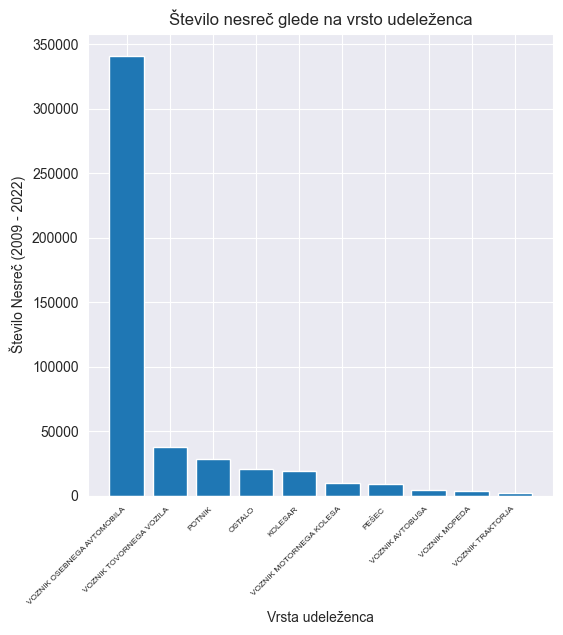

In [12]:
prevozno_sredstvo = {}

for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            vrstaUde = row_split[29]

            if vrstaUde not in prevozno_sredstvo:
                prevozno_sredstvo[vrstaUde] = 0
            else:
                prevozno_sredstvo[vrstaUde] += 1

sortiran_prevozno_sredstvo = dict(sorted(prevozno_sredstvo.items(), key=lambda x: x[1], reverse=True)[:10])
prevoz = list(sortiran_prevozno_sredstvo.keys())
stevila = list(sortiran_prevozno_sredstvo.values())

plt.figure(figsize=(6, 6))
plt.bar(prevoz, stevila)
plt.xlabel('Vrsta udeleženca')
plt.ylabel('Število Nesreč (2009 - 2022)')
plt.title('Število nesreč glede na vrsto udeleženca')
plt.xticks(rotation=45, ha='right', fontsize=6)
plt.show()

Odgovor: **koda analizira podatke o vrsti udeležencev v prometnih nesrečah. Najprej se ustvari prazen slovar prevozno_sredstvo, ki bo shranjeval število nesreč glede na vrsto udeleženca. Nato se berejo podatki iz CSV datotek, kjer se za vsako vrstico izlušči vrsta udeleženca. Če vrsta udeleženca še ni prisotna v slovarju prevozno_sredstvo, se doda s številom nesreč enako 0. V nasprotnem primeru se število nesreč za določeno vrsto udeleženca poveča za 1. Nato se slovar prevozno_sredstvo sortira po vrednostih v padajočem vrstnem redu in omeji na prvih 10 elementov. Nato se izluščijo ključi (vrste udeležencev) in vrednosti (število nesreč) iz sortiranega slovarja. Nato se prikaže stolpčni diagram, ki prikazuje število nesreč glede na vrsto udeleženca. Oznake osi, naslov in velikost besedila se prilagodijo za boljše branje.**

#### 3. Spraševali smo se, kako se število nesreč spreminja skozi i čas kjer smo vzeli CSV datoteke nesreč od 2009-2021. Podatke o nesrečah smo združevali po mesecih. Ugotovili smo, da se nesreče večkrat pojavljajo poleti.

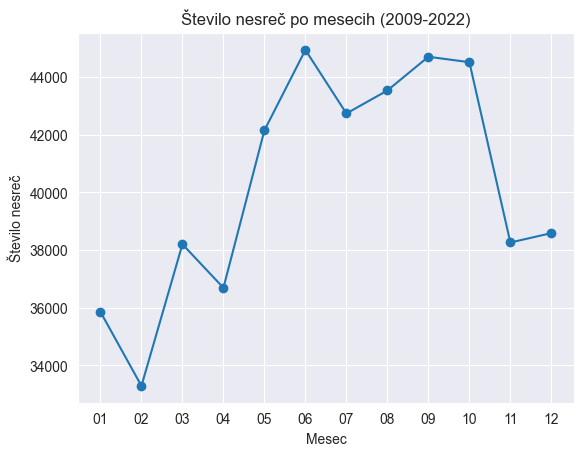

In [29]:
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

datoteke = ["pn2009", "pn2010", "pn2011", "pn2012", "pn2013", "pn2014", "pn2015", "pn2016", "pn2017", "pn2018", "pn2019", "pn2020", "pn2021", "pn2022"]
nesrece_datum = {}
for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            mesec = int(row[0].split(";")[3].split(".")[1])
            nesrece_datum[mesec] = nesrece_datum.get(mesec, 0) + 1

nesrece_datum_sorted = {k: v for k, v in sorted(nesrece_datum.items(), key=lambda item: int(item[0]))}
meseci = list(nesrece_datum_sorted.keys())
stevila_nesrec = list(nesrece_datum_sorted.values())

meseci_str = [str(m).zfill(2) for m in meseci]

plt.plot(meseci_str, stevila_nesrec, marker='o')
plt.title("Število nesreč po mesecih (2009-2022)")
plt.xlabel("Mesec")
plt.ylabel("Število nesreč")
plt.show()

Odgovor: **Ta koda prebere več CSV datotek, ki vsebujejo podatke o prometnih nesrečah v Sloveniji med leti 2009 in 2022, in izračuna število nesreč, ki se je zgodilo v vsakem mesecu. Nato izriše graf, ki prikazuje število nesreč za vsak mesec v tem obdobju. Za branje CSV datotek se uporablja knjižnica csv, za risanje grafa pa knjižnici matplotlib in seaborn.**

**Koda najprej ustvari seznam imen datotek, ki jih je treba prebrati, in prazen slovar nesrece_datum, ki bo vseboval število nesreč po mesecih. Nato z uporabo zanke for prebere vsako datoteko po vrsti in znotraj vsake datoteke prebere vrstice in za vsako vrstico izračuna mesec, v katerem se je nesreča zgodila. V slovar nesrece_datum doda enico za ta mesec (ali poveča obstoječi vrednost za ena, če obstaja že v slovarju).**

**Nato se slovar nesrece_datum uredi po mesecih in shrani v spremenljivki nesrece_datum_sorted. S seznama ključev in vrednosti tega slovarja se nato ustvarita dva seznama: meseci in stevila_nesrec. S seznama ključev se izračunajo še nizi z zapolnjenimi ničlami, ki predstavljajo imena mesecev v obliki "01", "02" itd. S temi tremi seznami se na koncu nariše graf z uporabo funkcije plt.plot() iz knjižnice matplotlib. V grafu so na x osi prikazani meseci, na y osi pa število nesreč. Na koncu se graf prikaže z uporabo funkcije plt.show().**

#### 3.1. Ugotovili smo tudi, da se čez poleten čas se nesreče dogajajo zaradi neupoštevanja pravil prednosti, med tem, ko se pozimi dogajajo zaradi neprilagojene hitrosti.

In [30]:

vzroki_datum = {}
for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)
        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            mesec = int(row_split[3].split(".")[1])
            Vzrok = row_split[14]
            count = 1
            if mesec in vzroki_datum and Vzrok in vzroki_datum[mesec] and Vzrok != "PREMIKI Z VOZILOM":
                count = vzroki_datum[mesec][Vzrok] + 1
            vzroki_datum.setdefault(mesec, {}).update({Vzrok: count})

max_vzrok_mesec = {}
for mesec, vzroki in vzroki_datum.items():
    max_vzrok = max(vzroki, key=lambda k: vzroki[k])
    max_vzrok_mesec[mesec] = max_vzrok

max_vzrok_mesec_sorted = {k: v for k, v in sorted(max_vzrok_mesec.items(), key=lambda item: int(item[0]))}
meseci = {1:"januar", 2:"februar", 3:"marec", 4:"april", 5:"maj", 6:"junij", 7:"julij", 8:"avgust", 9:"november", 10:"oktober", 11:"november", 12:"december"}
for mesec, vzrok in max_vzrok_mesec_sorted.items():
    print(f"{meseci[mesec]}: {vzrok}")

januar: NEPRILAGOJENA HITROST
februar: NEPRILAGOJENA HITROST
marec: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
april: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
maj: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
junij: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
julij: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
avgust: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
november: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
oktober: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
november: NEUPOŠTEVANJE PRAVIL O PREDNOSTI
december: NEPRILAGOJENA HITROST


Odgovor: **Ta koda bere podatke iz datotek v mapi "podatki" in išče najpogostejši vzrok nesreč v vsakem mesecu v obdobju od leta 2009 do 2022. Za vsako datoteko se uporablja zanko for, ki bere vrstice iz CSV datoteke z uporabo csv.reader. Pri branju vrstic se uporablja next(), da se preskoči vrstica z imeni stolpcev. Za vsako vrstico se mesec nesreče določi iz zapisa datuma v stolpcu 0 (prvem stolpcu), nato pa se določi najpogostejši vzrok nesreče na podlagi zapisa v stolpcu 14 (15. stolpec). Če je vzrok nesreče "PREMIKI Z VOZILOM", se ta ne upošteva pri iskanju najpogostejšega vzroka. Najpogostejši vzrok v vsakem mesecu se shrani v slovar max_vzrok_mesec, ki ga je mogoče urediti po mesecih in izpisati v slovenskem jeziku z uporabo slovarja meseci.**

#### 4. Spraševali smo se katere vrste nesreč so najpogostejše, katere so najbolj nevarne in kateri dejavniki prispevajo k njim. Podatke smo grupirali po vzroku nesreče in potem po posledici nesreče. Ugotovili smo, da se večina nesreč konča z materialno škodo, zaradi neustreznih premikov s vozilom. Največ smrti in resnih telesnih poškodb pa so posledice prehitre vožnje.

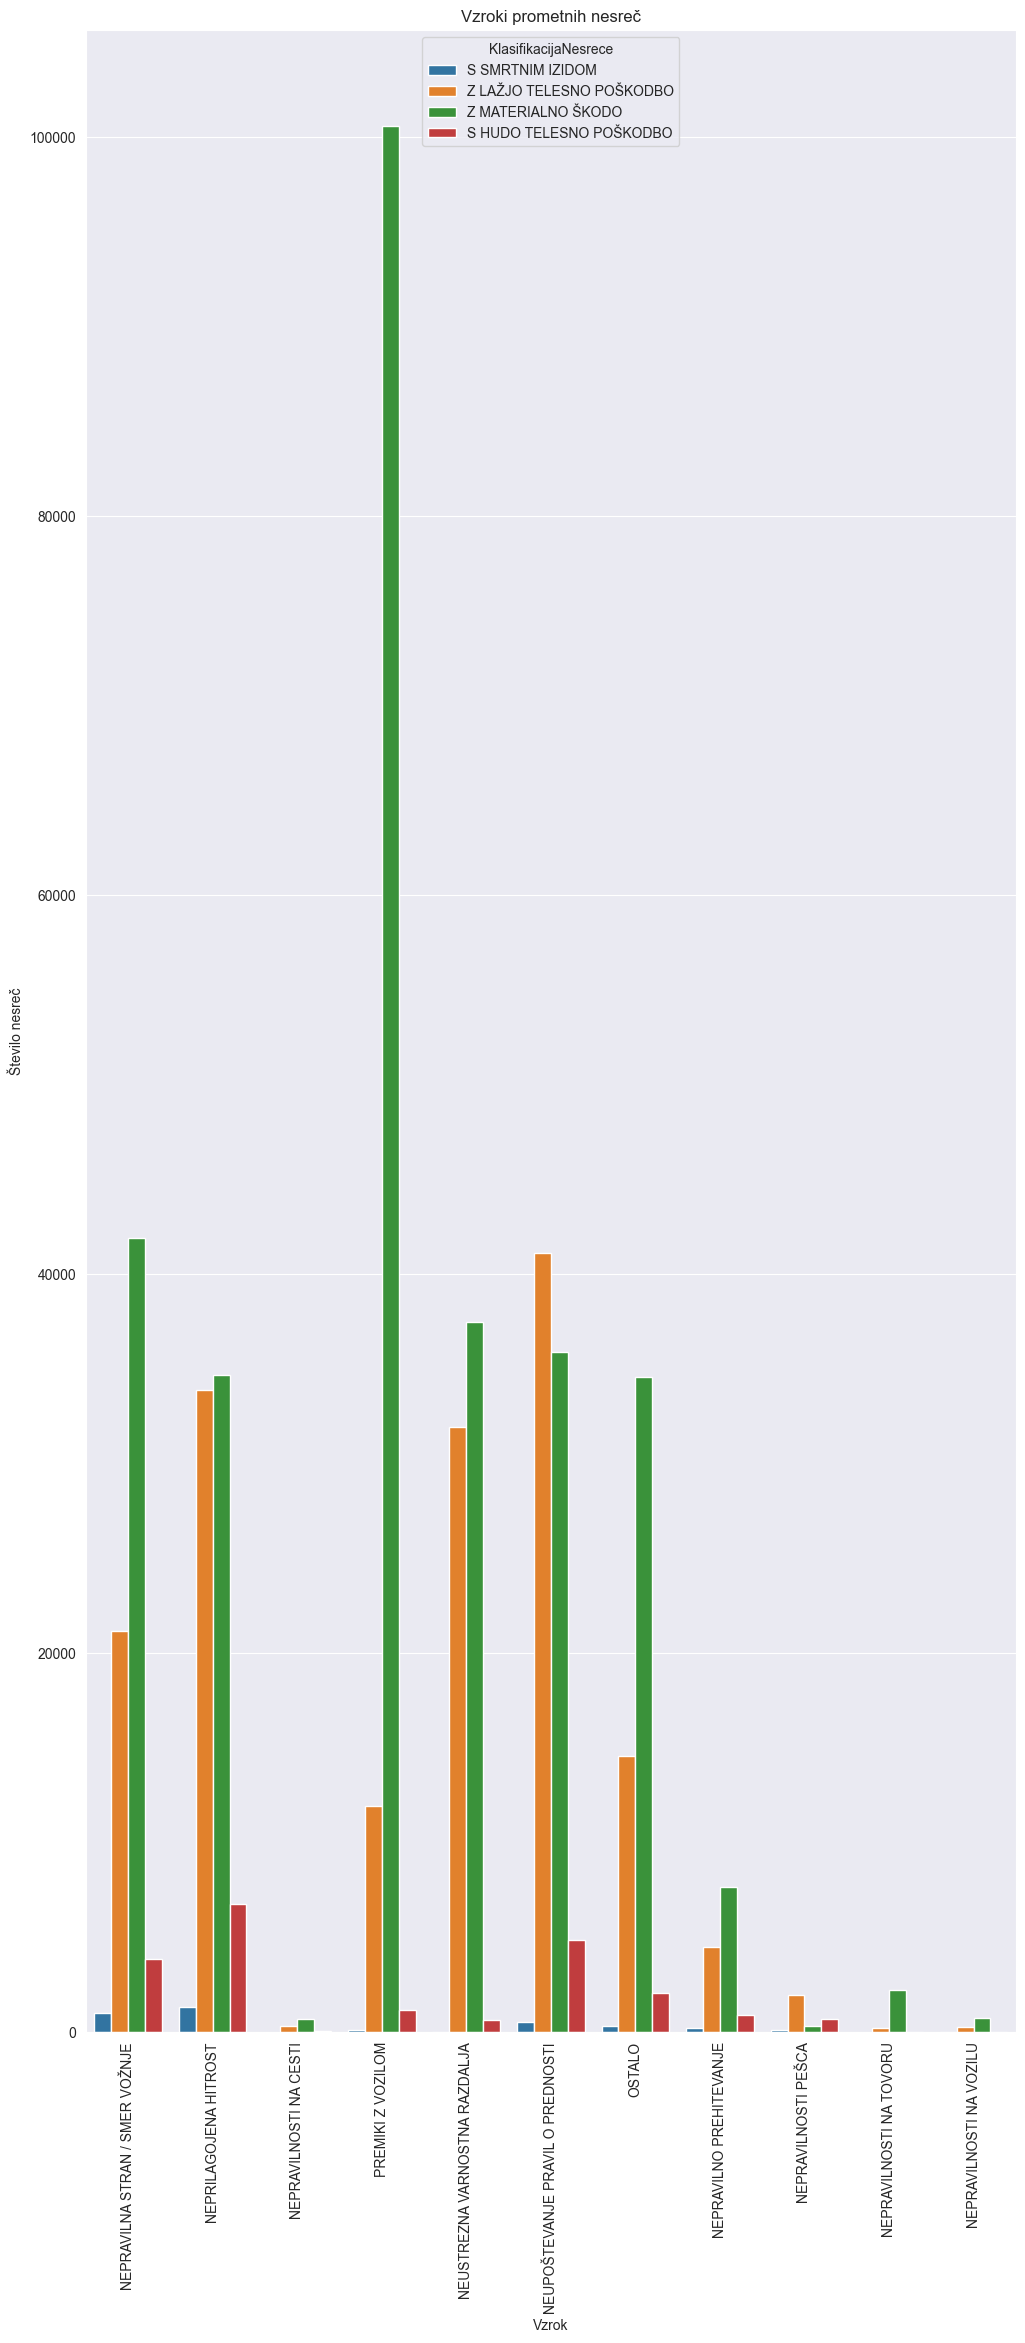

In [31]:
vzroki = {}
klasifikacije = set()
for datoteka in datoteke:
    with open(f'podatki/{datoteka}.csv', 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            row_split = (row[0] + row[1]).split(";")
            Vzrok = row_split[14]
            KlasifikacijaNesrece = row_split[1]
            klasifikacije.add(KlasifikacijaNesrece)

            if (Vzrok, KlasifikacijaNesrece) not in vzroki:
                vzroki[(Vzrok, KlasifikacijaNesrece)] = 1
            else:
                vzroki[(Vzrok, KlasifikacijaNesrece)] += 1

vzroki_df = pd.DataFrame(list(vzroki.items()), columns=['Vzrok, KlasifikacijaNesrece', 'Število nesreč'])
vzroki_df[['Vzrok', 'KlasifikacijaNesrece']] = pd.DataFrame(vzroki_df['Vzrok, KlasifikacijaNesrece'].tolist(), index=vzroki_df.index)

plt.figure(figsize=(12, 26))
sns.set_style("darkgrid")
ax = sns.barplot(x="Vzrok", y="Število nesreč", hue='KlasifikacijaNesrece', hue_order=list(klasifikacije), data=vzroki_df)
ax.set_title("Vzroki prometnih nesreč")
ax.set_xlabel("Vzrok")
ax.set_ylabel("Število nesreč")
plt.xticks(rotation=90)
plt.show()

Odgovor: **Ta koda prebere več CSV datotek in ustvari slovar, ki vsebuje pare ključ-vrednost, kjer so ključi sestavljeni iz dveh elementov: vzroka in klasifikacije nesreče. Vrednosti predstavljajo število nesreč, ki so bile povzročene zaradi določenega vzroka in klasifikacije nesreče. Nato se ustvari grafični prikaz teh podatkov z uporabo knjižnice Seaborn. Na grafu so prikazane vrednosti števila nesreč glede na vzrok in klasifikacijo nesreče.**

#### 5.1. Ugotavljali smo tudi vpliv alkohola na nesreče glede na preteklo prisotnost alkohola pri nesrečah, kjer opazimo, da je relativno majhen procent nesreč pod vplivom alkohola.:

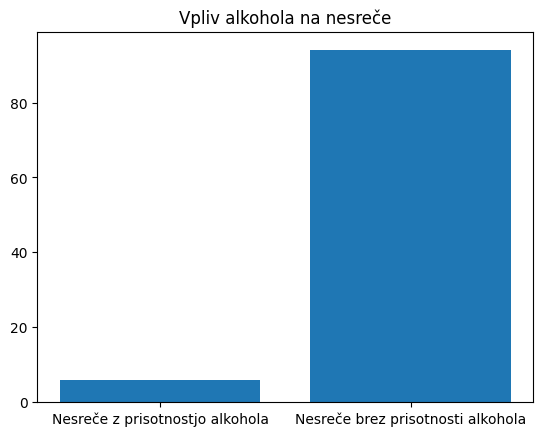

In [4]:
import os
import csv
import matplotlib.pyplot as plt
combined_data = []
for year in range(2009, 2023):
    filename = f"pn{year}.csv"
    if os.path.exists(filename):
        with open(filename, "r", encoding='cp1252') as csvfile:
            reader = csv.reader(csvfile)
            next(reader)
            for row in reader:
                if len(row[0].split(';')) == 34:
                    new_row = (row[0].split(';')[:-1])
                    new_row.append(row[1][:2]), new_row.append(row[2].strip(';'))
                    combined_data.append(new_row)

total_accidents = 0
alcohol_accidents = 0
for row in combined_data:
    alcohol_level = int(row[33])
    total_accidents += 1
    if alcohol_level > 1:
        alcohol_accidents += 1
percent_alcohol_accidents = alcohol_accidents / total_accidents * 100
percent_non_alcohol_accidents = 100 - percent_alcohol_accidents
labels = ['Nesreče z prisotnostjo alkohola', 'Nesreče brez prisotnosti alkohola']
percentages = [percent_alcohol_accidents, percent_non_alcohol_accidents]
x = range(len(labels))
fig, ax = plt.subplots()
ax.bar(x, percentages)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('Vpliv alkohola na nesreče')
plt.show()

Odgovor: **Ta koda združuje podatke iz več datotek CSV v eno skupno podatkovno strukturo. Nato šteje število nesreč in nesreč, ki so se zgodile zaradi alkohola. Končno prikaže rezultate v obliki krožnega diagrama, ki prikazuje odstotek nesreč z alkoholom in brez alkohola.**

#### 5.2. Pregledovali so tudi povezavo vozne podlage z pogostostjo nesreč.:

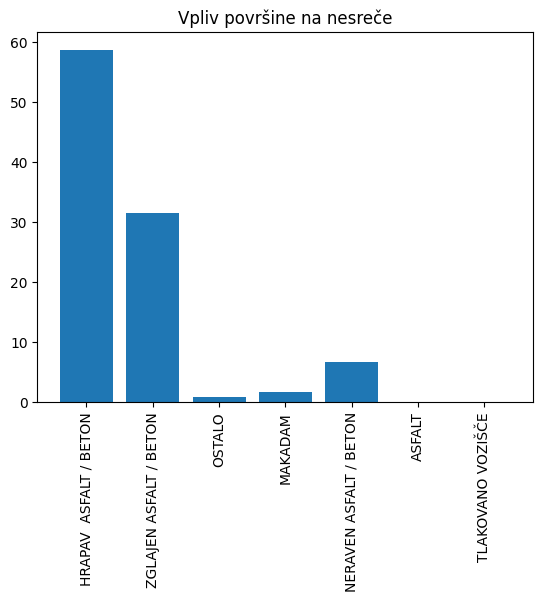

In [6]:
import os
import csv
import matplotlib.pyplot as plt
total_accidents = 0
rough, smooth, other, gravel, bumpy, asphalt, concrete, tile = 0, 0, 0, 0, 0, 0, 0, 0
for row in combined_data:
    surface = row[19]
    total_accidents += 1
    if surface == 'HRAPAV  ASFALT / BETON':
        rough += 1
    if surface == 'ZGLAJEN ASFALT / BETON':
        smooth += 1
    if surface == 'OSTALO':
        other += 1
    if surface == 'MAKADAM':
        gravel += 1
    if surface == 'ASFALT':
        asphalt += 1
    if surface == 'BETON':
        concrete += 1
    if surface == 'TLAKOVANO VOZIŠÈE':
        tile += 1
percent_rough = rough / total_accidents * 100
percent_smooth = smooth / total_accidents * 100
percent_other = other / total_accidents * 100
percent_gravel = gravel / total_accidents * 100
percent_asphalt = asphalt / total_accidents * 100
percent_concrete = concrete / total_accidents * 100
percent_tile = tile / total_accidents * 100
labels = ['HRAPAV  ASFALT / BETON', 'ZGLAJEN ASFALT / BETON', 'OSTALO', 'MAKADAM', 'NERAVEN ASFALT / BETON', 'ASFALT', 'TLAKOVANO VOZIŠČE']
percentages = [float(percent_rough), float(percent_smooth), float(percent_other), float(percent_gravel), float(percent_asphalt), float(percent_concrete), float(percent_tile)]
x = range(len(labels))
fig, ax = plt.subplots()
ax.bar(x, percentages)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title('Vpliv površine na nesreče')
plt.show()

Odgovor: **Ta koda šteje število nesreč glede na vrsto ceste ali površino, na kateri se je nesreča zgodila. Zabeleži se skupno število nesreč in nato izračuna odstotek nesreč glede na vsako vrsto površine (hrapav asfalt/beton, zglajen asfalt/beton, ostalo, makadam, neraven asfalt/beton, asfalt, tlakovano vozišče). Končno se prikaže rezultate v obliki krožnega diagrama.**

#### 5.3. Pri opazovanju nesreč glede na stanje cestišča presenetljivo ugototivmo da se večino nesreč zgodi na suhih cestah.

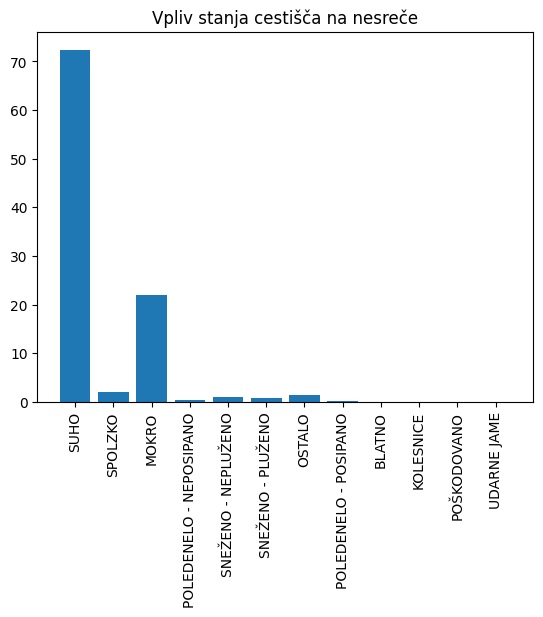

In [2]:
import os
import csv
import matplotlib.pyplot as plt
total_accidents = 0
dry, slipery, wet, icy_not_sprinkled, snow_not_plowed, snow_plowed, other, icy_sprinkled, muddy, tracks, damaged, potholes = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for row in combined_data:
    surface = row[18]
    total_accidents += 1
    if surface == 'SUHO':
        dry += 1
    if surface == 'SPOLZKO':
        slipery += 1
    if surface == 'MOKRO':
        wet += 1
    if surface == 'POLEDENELO - NEPOSIPANO':
        icy_not_sprinkled += 1
    if surface == 'SNEŽENO - NEPLUŽENO':
        snow_not_plowed += 1
    if surface == 'SNEŽENO - PLUŽENO':
        snow_plowed += 1
    if surface == 'OSTALO':
        other += 1
    if surface == 'POLEDENELO - POSIPANO':
        icy_sprinkled += 1
    if surface == 'BLATNO':
        muddy += 1
    if surface == 'KOLESNICE':
        tracks += 1
    if surface == 'POŠKODOVANO':
        damaged += 1
    if surface == 'UDARNE JAME':
        potholes += 1
percent_dry = dry / total_accidents * 100
percent_slipery = slipery / total_accidents * 100
percent_wet = wet / total_accidents * 100
percent_icy_not_sprinkled = icy_not_sprinkled / total_accidents * 100
percent_snow_not_plowed = snow_not_plowed / total_accidents * 100
percent_snow_plowed = snow_plowed / total_accidents * 100
percent_other = other / total_accidents * 100
percent_icy_sprinkled = icy_sprinkled / total_accidents * 100
percent_muddy = muddy / total_accidents * 100
percent_tracks = tracks / total_accidents * 100
percent_damaged = damaged / total_accidents * 100
percent_potholes = potholes / total_accidents * 100
labels = ['SUHO', 'SPOLZKO', 'MOKRO', 'POLEDENELO - NEPOSIPANO', 'SNEŽENO - NEPLUŽENO', 'SNEŽENO - PLUŽENO', 'OSTALO', 'POLEDENELO - POSIPANO', 'BLATNO', 'KOLESNICE', 'POŠKODOVANO', 'UDARNE JAME']
percentages = [float(percent_dry), float(percent_slipery), float(percent_wet), float(percent_icy_not_sprinkled), float(percent_snow_not_plowed), float(percent_snow_plowed), float(percent_other), float(percent_icy_sprinkled), float(percent_muddy), float(percent_tracks), float(percent_damaged), float(percent_potholes)]
x = range(len(labels))
fig, ax = plt.subplots()
ax.bar(x, percentages)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title('Vpliv stanja cestišča na nesreče')
plt.show()

Odgovor: **Ta koda šteje število nesreč glede na stanje cestišča. Zabeleži se skupno število nesreč in nato izračuna odstotek nesreč glede na vsako vrsto stanja cestišča (suho, spolzko, mokro, poledenelo - neposipano, sneženo - nepluženo, sneženo - pluženo, ostalo, poledenelo - posipano, blatno, kolesnice, poškodovano, udarne jame). Končno se prikaže rezultate v obliki krožnega diagrama.**

#### 5.4. Za promet pa smo ugotovili da ne vliva veliko na verjetnost nesreče, saj je relativno dobro razporejeno čez vse kategorije.:

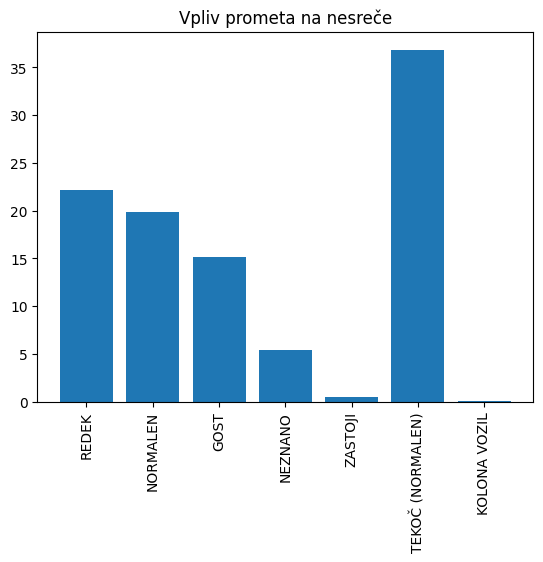

In [7]:
import os
import csv
import matplotlib.pyplot as plt
total_accidents = 0
rare, normal, thick, unknown, stops, flowing, convoy = 0, 0, 0, 0, 0, 0, 0
for row in combined_data:
    surface = row[17]
    total_accidents += 1
    if surface == 'REDEK':
        rare += 1
    if surface == 'NORMALEN':
        normal += 1
    if surface == 'GOST':
        thick += 1
    if surface == 'NEZNANO':
        unknown += 1
    if surface == 'ZASTOJI':
        stops += 1
    if surface == 'TEKOÈ (NORMALEN)':
        flowing += 1
    if surface == 'KOLONA VOZIL':
        convoy += 1
percent_rare = rare / total_accidents * 100
percent_normal = normal / total_accidents * 100
percent_thick = thick / total_accidents * 100
percent_unknown = unknown / total_accidents * 100
percent_stops = stops / total_accidents * 100
percent_flowing = flowing / total_accidents * 100
percent_convoy = convoy / total_accidents * 100
labels = ['REDEK', 'NORMALEN', 'GOST', 'NEZNANO', 'ZASTOJI', 'TEKOČ (NORMALEN)', 'KOLONA VOZIL']
percentages = [float(percent_rare), float(percent_normal), float(percent_thick), float(percent_unknown), float(percent_stops), float(percent_flowing), float(percent_convoy)]
x = range(len(labels))
fig, ax = plt.subplots()
ax.bar(x, percentages)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_title('Vpliv prometa na nesreče')
plt.show()

Odgovor: **Ta koda šteje število nesreč glede na gostoto prometa. Zabeleži se skupno število nesreč in nato izračuna odstotek nesreč glede na vsako vrsto gostote prometa (redka, normalna, gosta, neznana, zastoji, tekoč promet (normalen), kolona vozil). Končno se prikaže rezultate v obliki krožnega diagrama.**